# Image Transformation (i.e. Image Augmentation) - 图像变换 (图像增强)

Learn how to apply various image augmentation techniques with TensorFlow 2.0. The transformations are meant to be applied for each image sample when training only, and each transformation will be performed with random parameters.

学习如何使用 TensorFlow 2.0 应用各种图像增强技术。这些变换只用于训练时，每个变换都会使用随机参数执行。

**Transformations:**
- Random flip left-right
- Random contrast, brightness, saturation and hue
- Random distortion and crop

**变换:**
- 随机左右翻转
- 随机对比度、亮度、饱和度和色调
- 随机扭曲和裁剪

For more information about loading data with TF2.0, see: [load_data.ipynb](load_data.ipynb)

有关使用 TF2.0 加载数据的更多信息，请参见: [load_data.ipynb](load_data.ipynb)

**译者注** ： *你可能会好奇为什么需要对图像进行增强，这是因为在训练神经网络时，我们需要尽可能多的数据来训练模型，但是现实中的数据是有限的，我们需要对数据进行增强，这样一张图片就可以变成多张图片，从而增加数据量。你可能会疑惑，简单的图形变换真的能让模型学到理想的特征吗？答案是肯定的，因为这些变换是合理的，比如左右翻转，对比度增强等，这些变换不会改变图像的本质特征，因此可以让模型学到更多的理想特征；这和人类的认知是类似，即使这些图片经过变换，我们也能很容易的识别出来，这是因为我们的大脑已经学会了通过理想的特征来识别物体、而不受到一些基础变换的影响。*

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [271]:
from __future__ import absolute_import, division, print_function

from IPython.display import Image as IImage, display
import numpy as np
import PIL
from PIL import Image
import random
import requests
import tensorflow as tf

In [272]:
# Download an image. - 下载一张图片。
# d = requests.get("https://www.paristoolkit.com/Images/xeffel_view.jpg.pagespeed.ic.8XcZNqpzSj.jpg")
# with open("image.jpeg", "wb") as f:
#     f.write(d.content)
# 译者注：这张图片已经404了，这里改成直接从本地resources文件夹中读取图片

In [273]:
# Load image to numpy array.
img = Image.open('../../../resources/img/tf2/image.png')
img.load()
img_array = np.array(img)

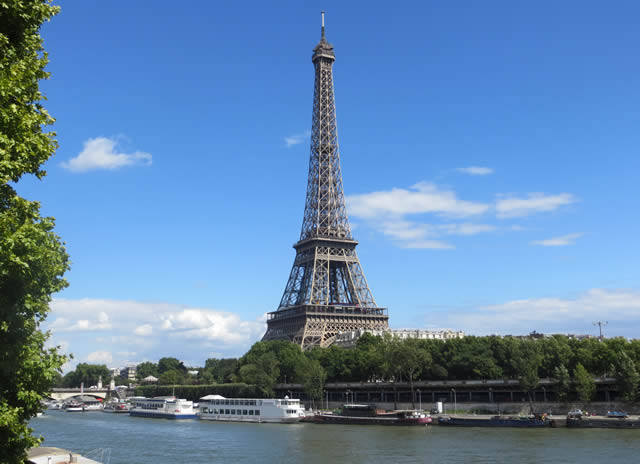

In [274]:
# Display image.
PIL.Image.fromarray(img_array)

In [275]:
# Randomly flip an image. - 随机翻转一张图片。
def random_flip_left_right(image):
    return tf.image.random_flip_left_right(image)

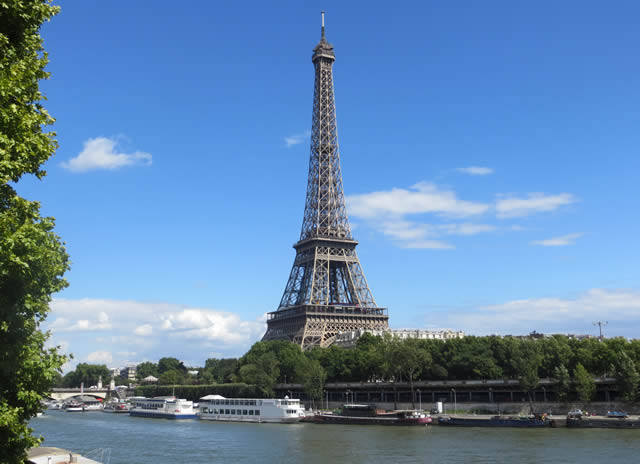

In [276]:
# Display randomly flipped image. - 显示随机翻转后的图片。
Image.fromarray(random_flip_left_right(img_array).numpy())
# 译者注：这里可以多次运行，可以观察到会有不同的翻转结果

In [277]:
# Randomly change an image contrast. - 随机改变一张图片的对比度。
def random_contrast(image, minval=0.6, maxval=1.4):
    r = tf.random.uniform([], minval=minval, maxval=maxval)
    image = tf.image.adjust_contrast(image, contrast_factor=r)
    return tf.cast(image, tf.uint8)

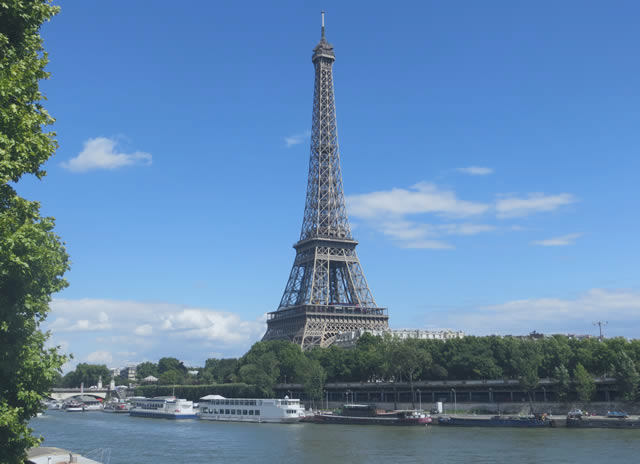

In [278]:
# Display image with different contrast. - 显示对比度不同的图片。
PIL.Image.fromarray(random_contrast(img_array).numpy())
# 译者注：这里可以多次运行，可以观察到会有不同的对比度结果

In [279]:
# Randomly change an image brightness - 随机改变一张图片的亮度。
def random_brightness(image, minval=0., maxval=.2):
    r = tf.random.uniform([], minval=minval, maxval=maxval)
    image = tf.image.adjust_brightness(image, delta=r)
    return tf.cast(image, tf.uint8)

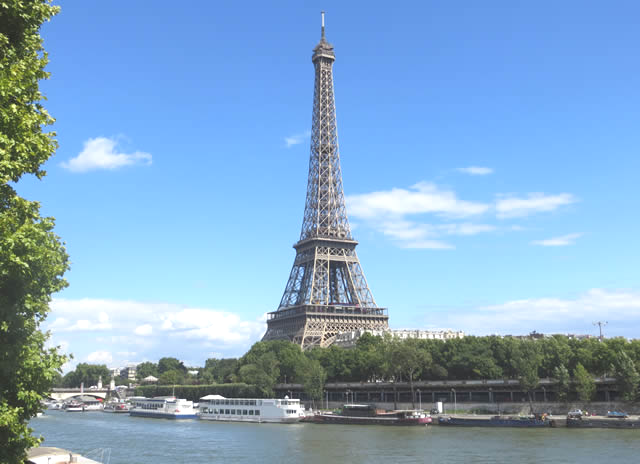

In [280]:
# Display image with different brightness. - 显示亮度不同的图片
PIL.Image.fromarray(random_brightness(img_array).numpy())
# 译者注：这里可以多次运行，可以观察到会有不同的亮度结果

In [281]:
# Randomly change an image saturation - 随机改变一张图片的饱和度。
def random_saturation(image, minval=0.4, maxval=2.):
    r = tf.random.uniform((), minval=minval, maxval=maxval)
    image = tf.image.adjust_saturation(image, saturation_factor=r)
    return tf.cast(image, tf.uint8)

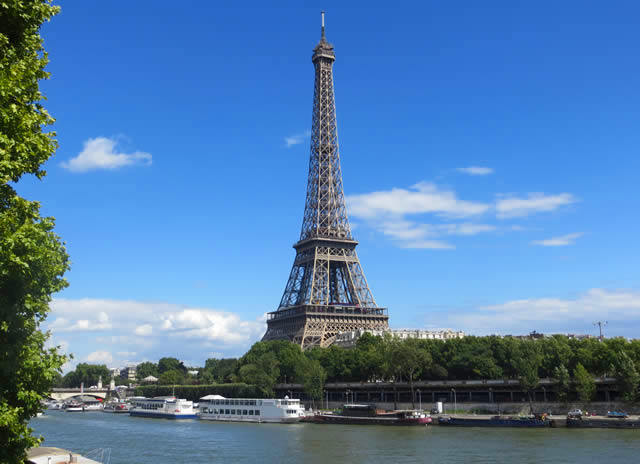

In [282]:
# Display image with different staturation. - 显示饱和度不同的图片
PIL.Image.fromarray(random_saturation(img_array).numpy())
# 译者注：这里可以多次运行，可以观察到会有不同的饱和度结果

In [283]:
# Randomly change an image hue. - 随机改变一张图片的色调。
def random_hue(image, minval=-0.04, maxval=0.08):
    r = tf.random.uniform((), minval=minval, maxval=maxval)
    image = tf.image.adjust_hue(image, delta=r)
    return tf.cast(image, tf.uint8)

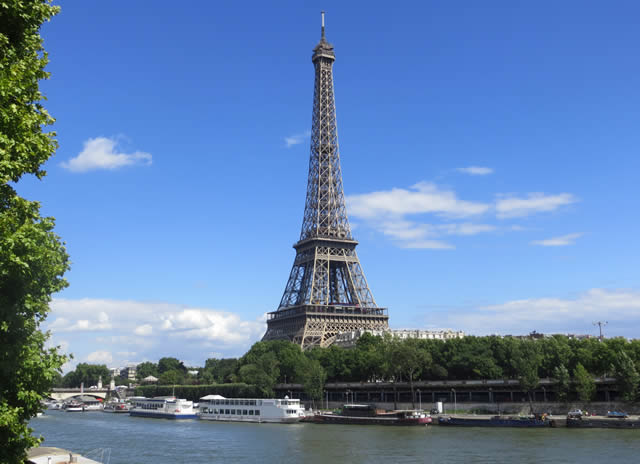

In [284]:
# Display image with different hue. - 显示色调不同的图片。
PIL.Image.fromarray(random_hue(img_array).numpy())
# 译者注：这里可以多次运行，可以观察到会有不同的色调结果

In [285]:
# Distort an image by cropping it with a different aspect ratio. - 通过不同的宽高比裁剪图片来扭曲图片。
def distorted_random_crop(image,
                min_object_covered=0.1,
                aspect_ratio_range=(3./4., 4./3.),
                area_range=(0.06, 1.0),
                max_attempts=100,
                scope=None):

    cropbox = tf.constant([0.0, 0.0, 1.0, 1.0], dtype=tf.float32, shape=[1, 1, 4])
    sample_distorted_bounding_box = tf.image.sample_distorted_bounding_box(
        tf.shape(image),
        bounding_boxes=cropbox,
        min_object_covered=min_object_covered,
        aspect_ratio_range=aspect_ratio_range,
        area_range=area_range,
        max_attempts=max_attempts,
        use_image_if_no_bounding_boxes=True)
    bbox_begin, bbox_size, distort_bbox = sample_distorted_bounding_box

    # Crop the image to the specified bounding box. - 将图片裁剪到指定的边界框。
    cropped_image = tf.slice(image, bbox_begin, bbox_size)
    return cropped_image

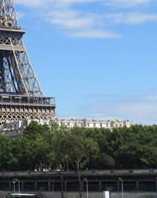

In [286]:
# Display cropped image. - 显示裁剪后的图片。
PIL.Image.fromarray(distorted_random_crop(img_array).numpy())
# 译者注：这里可以多次运行，可以观察到会有不同的裁剪结果

In [287]:
# Apply all transformations to an image. - 对一张图片应用所有的转换。
# That is a common image augmentation technique for image datasets, such as ImageNet. - 这是一种常见的图像增强技术，用于图像数据集，如ImageNet。
def transform_image(image):
    image = distorted_random_crop(image)
    image = random_flip_left_right(image)
    image = random_contrast(image)
    image = random_brightness(image)
    image = random_hue(image)
    image = random_saturation(image)
    return image

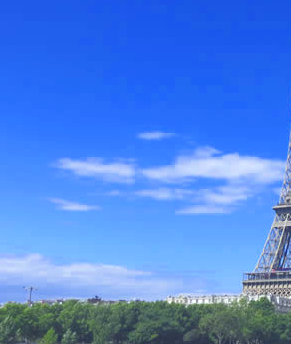

In [288]:
# Display fully pre-processed image. - 显示完全预处理后的图片。
transformed_img = transform_image(img_array).numpy()
PIL.Image.fromarray(transformed_img)
# 译者注：这里可以多次运行，可以观察到会有不同的预处理结果

In [289]:
# Resize transformed image to a 256x256px square image, ready for training. - 将转换后的图像调整大小为256x256px的正方形图像，准备进行训练。
def resize_image(image):
    image = tf.image.resize(image, size=(256, 256), preserve_aspect_ratio=False)
    image = tf.cast(image, tf.uint8)
    return image

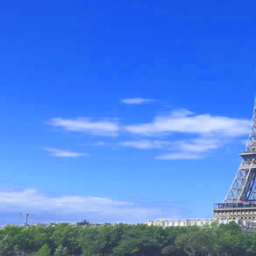

In [290]:
# Display resized image. - 显示调整大小后的图片。
PIL.Image.fromarray(resize_image(transformed_img).numpy())